# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

E-news Express, an online news portal, has seen a decline in new monthly susbcribers compared to the previous year. They believe the current webpage is not designed well or engaging customers. 

The company would like to use A/B testing to explore whether a new landing page increases subscription rates compared to the old landing page. 

100 users were randomly selected and divided into two equal groups. The first group interacted with the old landing page (control group), and the second group interacted with the new landing page (treatment group). 

E-news Express requests an exploration of the data with a statistical analysis at a significance level of 5% to answer the following questions:

1.   Do the users spend more time on the new landing page than on the existing landing page?
2.   Is the conversion rate for the new page greater than the conversion rate for the old page?
3.   Does the conversion status depend on the preferred language? 
4.   Is the time spent on the new page the same for the different language users?




#Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import library for statistical analysis
import scipy.stats as stats

## Reading the Data into a DataFrame

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# read the data set
df = pd.read_csv('/content/drive/MyDrive/Great Learning/Project 2/abtest.csv')


Mounted at /content/drive


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
# return the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
# return the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
# return the number of rows and columns
df.shape

(100, 6)

####Observations:
* The data set has 100 rows and 6 columns.

In [6]:
# return a summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


####Observations:
* There is 1 column of data type integer, 4 columns of data type string (object), and 1 column of data type numerical float.
* All the columns have 100 observations. 
* No columns have null values.

In [7]:
# describe the numerical data in df
df.describe(include = np.number)

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


####Observations
* The mean time spent on the page is 5.38 minutes, and the median time spent on the page is 5.44 minutes, suggesting a symmetrical and normal distribution.


In [8]:
# describe the categorgical data in df
df.describe(include = object)

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


####Observations
* There are unique values present in the categorical data.
* 54 users converted to subscribers.
* Out of 100 users, Spanish is the most preferred language at 34 users.
* Frequency suggests an even split of users in the treatment and control groups.

In [9]:
# check df for the count of null values (missing values) in each column
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

####Observations:
* There are no missing values in the data set.

In [10]:
# check for duplicate values 
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

####Observations
* There are no duplicate values in the data set.

### Univariate Analysis

####Analysis of Group

In [11]:
# check counts for group
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

####Observation
* There are 50 observations in the control group and 50 observations in the treatment group.


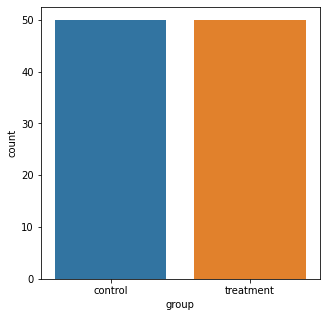

In [60]:
# set figure size
plt.figure(figsize=(5,5))

# draw countplot
sns.countplot(data = df, x = 'group');

####Observations
* The graph further concludes there are 50 observations in both the treatment and control groups as stated in the problem definition and objective.

####Analysis of Landing Page

In [13]:
# check counts for landing page
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

#### Observations
* There are 50 observations for the old landing page, and 50 observations for the new landing page.

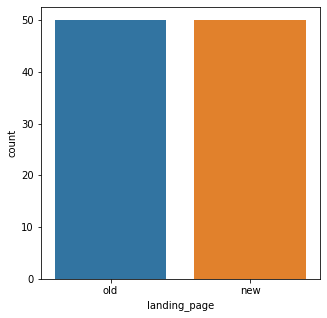

In [61]:
# set figure size
plt.figure(figsize=(5,5))

# draw countplot
sns.countplot(data = df, x = 'landing_page');

####Observations
* There are 50 visitors to the new landing page and 50 visitors to the old landing page.

####Analysis of Converted

In [15]:
# check counts for converts
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

####Observations
* 54 users converted to subrscriber.
* 46 users did not convert to subscriber.

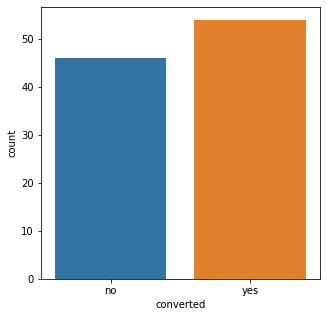

In [62]:
# set figure size
plt.figure(figsize=(5,5))

# draw countplot
sns.countplot(data = df, x = 'converted');

####Observations
* 54 out 100 users subscribed to the portal, leaving 46 users who did not subscribe.

####Analysis of Time Spent on the Page

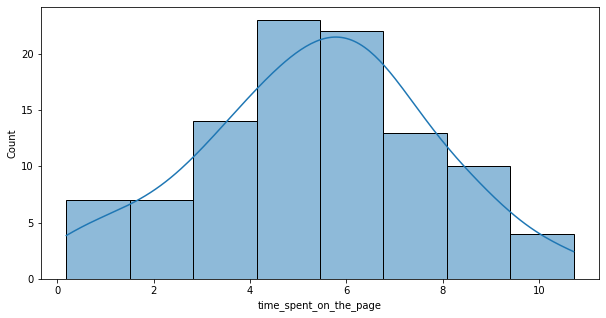

In [64]:
# set figure size
plt.figure(figsize=(10,5))

# draw hisotgram with kernel density estimation 
sns.histplot(data = df, x = 'time_spent_on_the_page', kde = True);

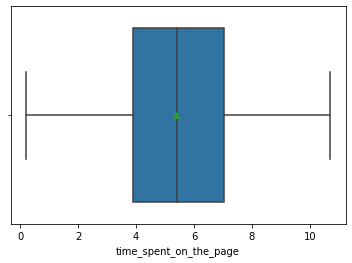

In [18]:
# draw boxplot with mean
sns.boxplot(data = df, x ='time_spent_on_the_page', showmeans = True);

####Observations
* The overal mean time spent on the page is around 6 minutes. 
* There are no outliers. 
* The average time spent on the page has a range of less than one minute to more than 10 minutes.

####Analysis of Preferred Language

In [19]:
# check counts for preferred language
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

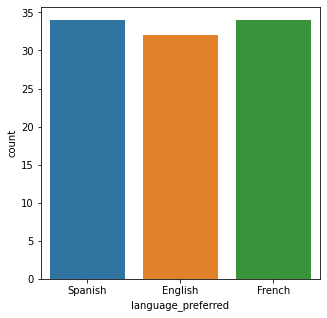

In [65]:
# set figure size
plt.figure(figsize=(5,5))

# draw countplot
sns.countplot(data = df, x = "language_preferred");

####Observations 
* French and Spanish are preferred equally at 34%.
* English comes in close third and is preferred by 32%.


### Bivariate Analysis

####Analysis of Language Preference and Time Spent on the Page

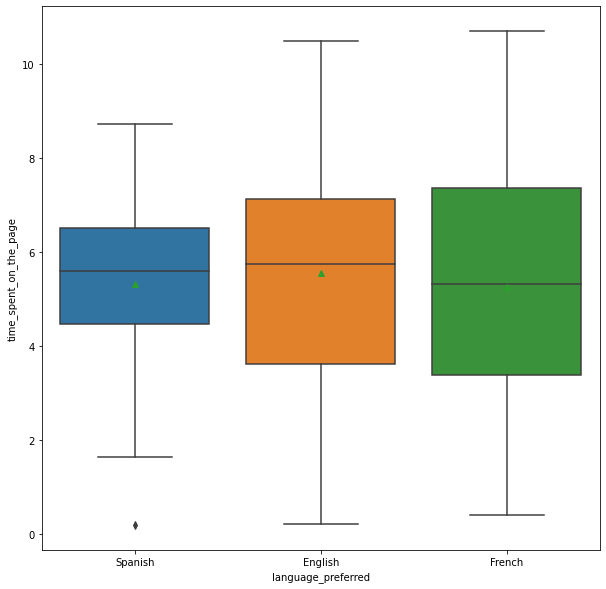

In [21]:
# set figure size
plt.figure(figsize=(10,10))

# draw boxplots with means
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True);

In [22]:
# calculate means of preferred language vs time spent on page
df.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

#### Observations
* There is no remarkable difference between mean time spent on the page and preferred language.
* There is an outlier in the Spanish group. 
* English and French have a larger range than Spanish for time spent on the page. 

####Analysis of Conversion Status and Time Spent on the Page

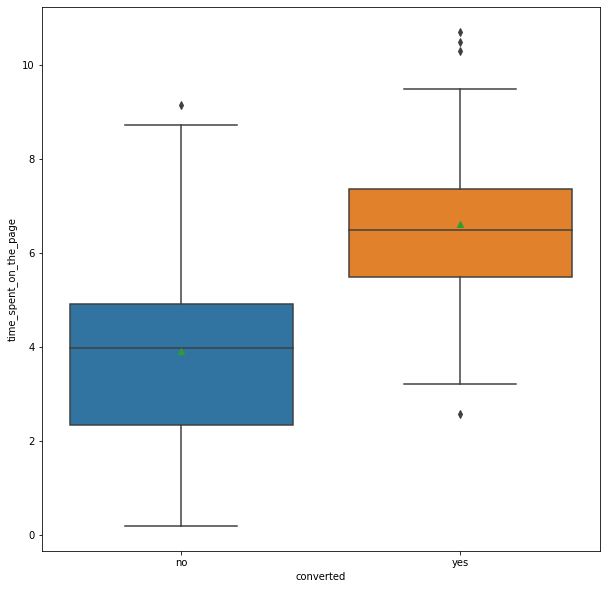

In [23]:
# set figure size
plt.figure(figsize=(10,10))

# draw boxplot with means
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page', showmeans = True);

In [24]:
# calculate means of converted vs time spent on page
df.groupby(['converted'])['time_spent_on_the_page'].mean()

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

####Observations
* There are outliers in both the yes and no groups. 
* Based on the boxplot, the more time a user spend on the page, the more likely they will be converted to a subscriber.
* The means confirm that converted users spent on average, 6.62 minutes on the page, while unconverted users spent on average 3.94 minutes on the page.

####Analysis of Landing Page and Time Spent on the Page

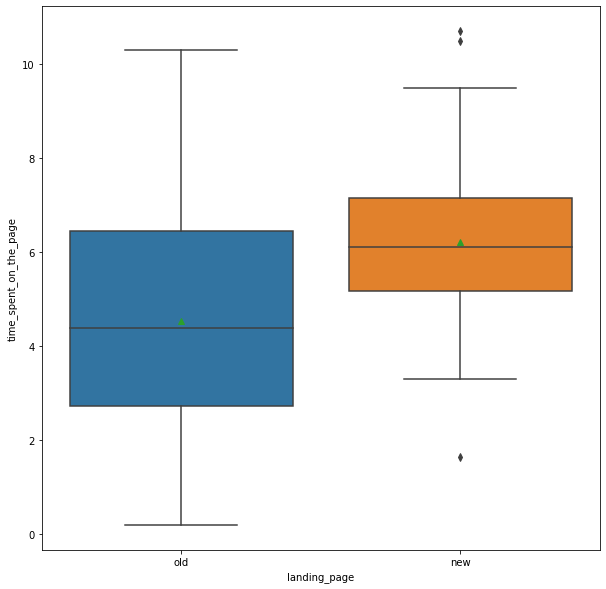

In [25]:
# set figure size
plt.figure(figsize=(10,10))

# draw boxplot with means
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page', showmeans = True);

In [26]:
# calculate means of landing page vs time spent on page
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

####Observations
**Old Page**
*   There are no outliers.
*   The minimum time spent on the page is just over 0 minutes, and the maximum time spent on the page is just over 10 minutes.
* The mean time spent on the page is around 5 minutes and approximately equal to the median (50th percentile), suggesting normal distribution.

**New Page**
* There are outliers on both sides. 
* The minimum time spent on the page is approximately 3 minutes, while the maximum time spent on the page is aroumd 9 minutes. 
* The mean time spent on the page is around 6 minutes and approximately equal to the median (50th percentile), suggesting normal distribution. 

The average time spent on the new landing page is higher than the average time spent on the old landing page.



####Analysis of Group and Time Spent on the Page 

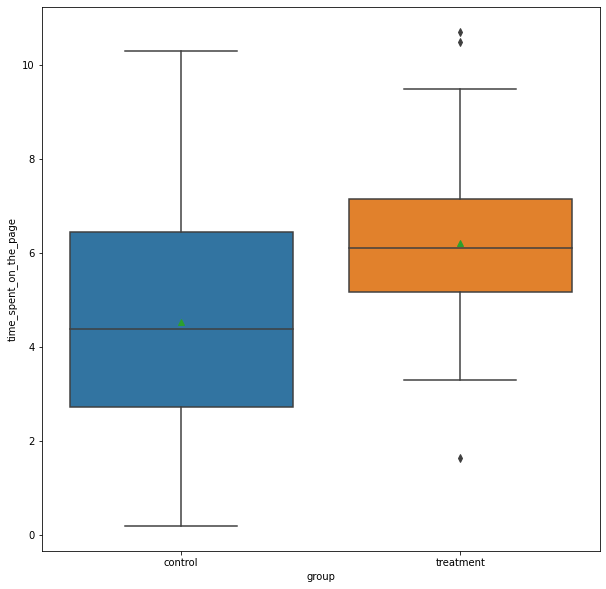

In [27]:
# set figure size
plt.figure(figsize=(10,10))

# draw boxplot with means
sns.boxplot(data = df, x = 'group', y = 'time_spent_on_the_page', showmeans = True);

In [28]:
# calculate means of group vs time spent on page
df.groupby(['group'])['time_spent_on_the_page'].mean()

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

####Observations
**Control Group**
* There are no outliers. 
* The minimum time spent on the page is almost 0 minutes, while the maximum time spent on the page is more than 10 minutes.
* The mean time spent on the page is approximately 4.5 minutes. 
* The IQR and spread is larger compared to the treatment group.

**Treatment Group**
* There are outliers on both sides.
* The minimum time spent on the page is approximately 3 minutes, while the maximum time spent on the page is around 9 minutes. 
* The mean time spent on the page is approximately 6 minutes. 

####Analysis of Group and Landing Page

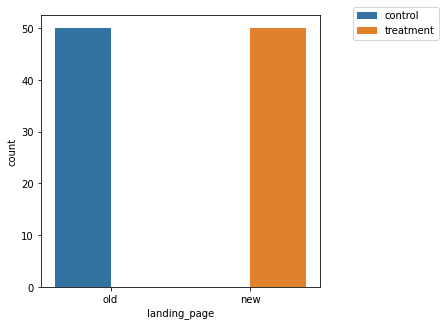

In [29]:
# set figure size
plt.figure(figsize=(5,5))

# draw countplot
sns.countplot(data = df, x = 'landing_page', hue = 'group')

# move legend outside of plot area
plt.legend(bbox_to_anchor = (1.1, 1.05))
plt.show()

####Observations
* There are 50 observations each for both the old and new landing pages.
* There are 50 observations each for both the control and treatment groups.

####Analysis of Group and Conversion Status

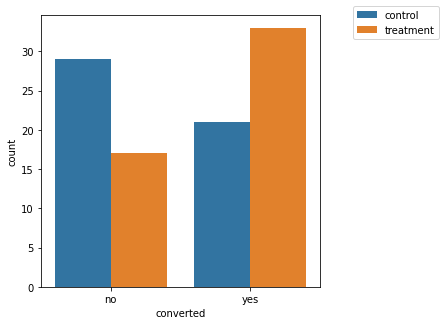

In [30]:
# set figure size
plt.figure(figsize=(5,5))

#draw countplot 
sns.countplot(data = df, x = 'converted', hue = 'group');

# move legend outside of plot area
plt.legend(bbox_to_anchor = (1.1, 1.05))
plt.show()

####Observations
**Control Group**
* There are less converted users than unconverted users.

**Treatment Group**
* There are more converted users than unconverted users.

####Analysis of Group and Preferred Language

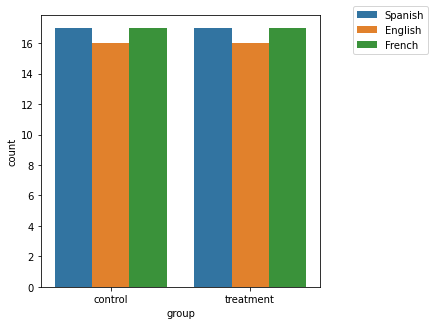

In [31]:
# set figure size
plt.figure(figsize=(5,5))

# draw countplot
sns.countplot(data = df, x = 'group', hue = 'language_preferred')

# move legend outside of plot area
plt.legend(bbox_to_anchor = (1.1, 1.05))
plt.show()

####Observations
* Language preference is almost equal for all languages across both the control and treatment groups.

####Analysis of Landing Page and Language Preference

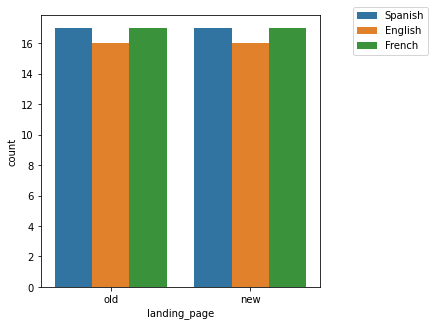

In [32]:
# set figure size
plt.figure(figsize=(5,5))

# draw countplot
sns.countplot(data = df, x= 'landing_page', hue = 'language_preferred')

# move legend outside of plot area
plt.legend(bbox_to_anchor = (1.1, 1.05))
plt.show()

###Observations
* The number of users preferring each language is equal for both the old and new landing pages.

####Analysis of Landing Page and Conversion Status


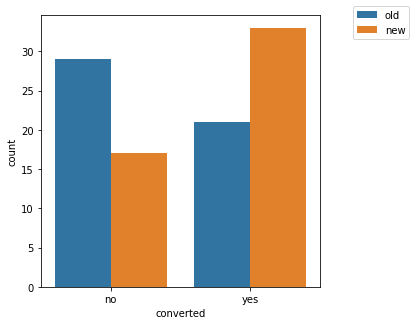

In [33]:
# set figure size
plt.figure(figsize=(5,5))

# draw countplot
sns.countplot(data = df, x = 'converted', hue = 'landing_page')

# move legend outside of plot area
plt.legend(bbox_to_anchor = (1.1, 1.05))
plt.show()

####Observations
**Old Page**
*   Approximately 21 users susbribed to the news portal, while 29 users did not susbcribe.

**New Page**
* Approximately 33 users subscribed to the news portal, while 17 users did not subscribe. 

On average, the new landing page has a higher conversion rate than the old landing page.

####Analysis of Preferred Language and Conversion Status


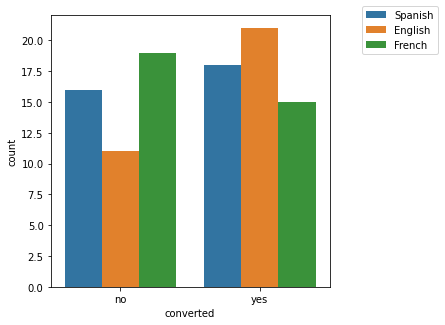

In [34]:
# set figure size
plt.figure(figsize=(5,5))

# draw countplot
sns.countplot(data = df, x = 'converted', hue = 'language_preferred')

# move legend outside of plot area
plt.legend(bbox_to_anchor = (1.1, 1.05))
plt.show()

####Observations
* More English users subscribed than Spanish or French users. 
* Users preferring French had the lowest conversion rate. 

##Summary of Exploratory Data Analysis
*   The mean time spent on the page is approximately 6 minutes.
*   Users spent more time on the new landing page.
*   54 out of 100 users converted to subscriber.
* Preferred language remained equal across the new and old landing pages.
* The number of users representing the three language preferences are almost equal. 
* French had the lowest conversion rate compared to Spanish or English. However, French still had more subacribers to the new landing page than the old landing page. 
* The more time a user spends on the landing page, the more likely the user converts to subscriber.

The exploratory analysis concludes the new landing page will increase conversion rates.





## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

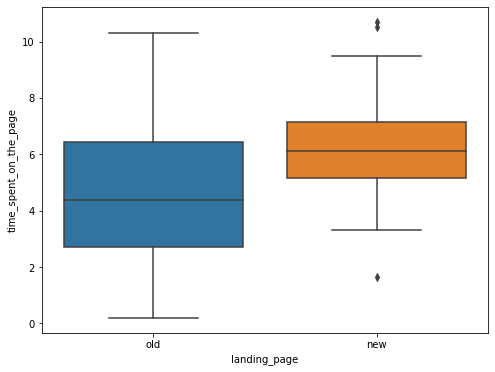

In [35]:
# set figure size
plt.figure(figsize=(8,6))

# draw boxplot
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df);


####Observations
* The mean time spent on the old page is approximately 4.5 minutes.
* There are outliers on both sides of the new landing page.
* The mean time spent on the new page is approximately 6 minutes.

### Step 1: Define the null and alternate hypotheses

µ1 = time spent on new landing page

µ2 = time spent on old landing page

Ho : µ1 <= µ2

Ha : µ1 > µ2

Significance level = 0.05

### Step 2: Select Appropriate test

There are two population means from two independent populations. The standard deviations are unknown, so a two independent sample t-test for equality of means is performed. 

### Step 3: Decide the significance level

  α = 0.05
  
  The problem statement provides the significance level of 0.05.

### Step 4: Collect and prepare data

In [36]:
# create subset for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subset for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [67]:
# output the sample standard deviations for the subsets rounded to two decimal places
print('Sample standard deviation of new landing page:', round(time_spent_new.std(),2))
print('Sample standard deviation of old landing page:', round(time_spent_old.std(),2))

Sample standard deviation of new landing page: 1.82
Sample standard deviation of old landing page: 2.58


In [38]:
# summarize the new landing page subset
time_spent_new.describe()

count    50.000000
mean      6.223200
std       1.817031
min       1.650000
25%       5.175000
50%       6.105000
75%       7.160000
max      10.710000
Name: time_spent_on_the_page, dtype: float64

In [39]:
# summarize the old landing page subset
time_spent_old.describe()

count    50.000000
mean      4.532400
std       2.581975
min       0.190000
25%       2.720000
50%       4.380000
75%       6.442500
max      10.300000
Name: time_spent_on_the_page, dtype: float64

####Observations
* There are large differences between the 25%, median, and mean values of the old and new pages.
* The sample mean and sample standard deviations are different for both the time spent on the new and old landing pages. 
* Therefore, the population standard deviation can be assumed unequal. 

## Confirm T-Test Assumptions
* Normal Distribution: Yes, the populations are assumed normal.
* Continuous Data: Yes, time is continous data.
* Independent Populations: Yes, each group is independent.
* Random Sampling: Yes, as stated in the problem statement overview.
* Unequal Standard Deviations: Yes

All assumptions for T-test are satisfied.


### Step 5: Calculate the p-value

In [40]:
# import required function
from scipy.stats import ttest_ind 

# return the test statistic and p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [41]:
# print conclusion using if/else statement
if p_value < 0.05:
    print(f'{p_value} is less than the level of significance, so we reject the null hypothesis.')
else:
    print(f'{p_value} is greater than the level of significance, so we fail to reject the null hypothesis.')


0.0001392381225166549 is less than the level of significance, so we reject the null hypothesis.


### Step 7:  Draw inference

* The p-value of approximately 0.0001 is less than 0.05, the level of significance. We have enough evidence to reject the null hypothesis.
* At a level of 5% significance, we conclude that users spend more time on the new landing page than the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

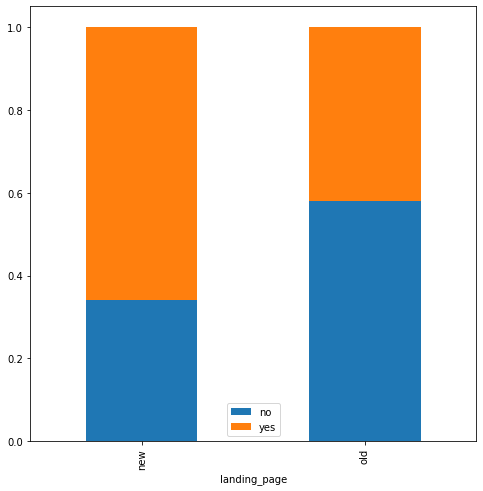

In [42]:
# draw stacked bar plot to compare the conversion rate for the new and old landing pages
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(8,8),stacked=True)
plt.legend()
plt.show()

####Observations
* More users converted to subscribers on the new landing page than the old landing page. 

### Step 1: Define the null and alternate hypotheses

p1 = proportion of users who visit the new landing page and convert to subscriber

p2 = proportion of users who visit the old landing page and convert to subscriber

Ho : p1 <= p2

Ha : p1 > p2

Significance level = 0.05

### Step 2: Select Appropriate test

There are two population proportions from two independent populations. A two proportions z-test will be used to check if np and n(1-p) values for both the old and new landing pages are > 10.

n = number of observations (50)

p1 = number of successes for new landing page (33/50)

p2 = number of success for old landing page (21/50)

np1 = 33

n(1 - p1) = 17

np2 = 21

n(1 - p2) = 29


## Confirm Z-Test Assumptions
* Binomial Distribution: Yes, converted or not converted.
* Independent Populations: Yes, each group is independent.
* Random Sampling: Yes, as stated in the problem statement overview.
* Is the binomial distribution approximately normally distributed: Yes, np and n(1-p) values are >=10.

All assumptions for Z-test are satisfied.


### Step 3: Decide the significance level

  α = 0.05
  
  The problem statement provides the significance level of 0.05.

### Step 4: Collect and prepare data

In [69]:
# new landing page = treatment group
# old landing page = control group 

# calculate number of converted users in treatment (new) group
converted_new = df[df['group'] == 'treatment']['converted'].value_counts()['yes']

# calculate number of converted users in control (old) group
converted_old = df[df['group'] == 'control']['converted'].value_counts()['yes'] 

# calculate total number of users in treatment (new) group
n_treatment = df.group.value_counts()['treatment']

# calculate total number of users in control (old)
n_control = df.group.value_counts()['control']

# print the number of converted users for each landing page
print('The numbers of users who converted using the new landing page is {0}.' .format(converted_new))
print('The numbers of users who converted using the old landing page is {0}.' .format(converted_old))

# print the number of user in each group 
print('The numbers of users viewing the new landing page is {0}.' .format(n_treatment))
print('The numbers of users viewing the old landing page is {0}.' .format(n_control))

The numbers of users who converted using the new landing page is 33.
The numbers of users who converted using the old landing page is 21.
The numbers of users viewing the new landing page is 50.
The numbers of users viewing the old landing page is 50.


### Step 5: Calculate the p-value

In [44]:
# import required function
from statsmodels.stats.proportion import proportions_ztest

# return the test statistic and p-value
test_stat, p_value = proportions_ztest([converted_new, converted_old], [n_treatment, n_control], alternative = 'larger')

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [45]:
# print conclusion using if/else statement
if p_value < 0.05:
    print(f'{p_value} is less than the level of significance, so we reject the null hypothesis.')
else:
    print(f'{p_value} is greater than the level of significance, so we fail to reject the null hypothesis.')


0.008026308204056278 is less than the level of significance, so we reject the null hypothesis.


### Step 7:  Draw inference


* The p-value is 0.008 which is less than the level of significance, 0.05. We have statistical evidence to reject the null hypothesis. 
* At 5% significance, we conclude that the proportion of users who visit the new landing page and convert to subscriber is greater than the proportion of users who convert to subscriber after visting the old landing page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

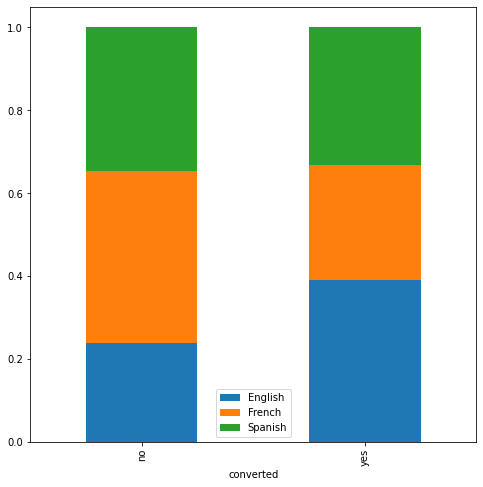

In [46]:
# draw stacked bar plot to compare the conversion rate and language preference
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(8,8), stacked=True)
plt.legend()
plt.show()


####Observations
* French users have the lowest conversion rate.
* Spanish and English users had higher overall conversion rates.


### Step 1: Define the null and alternate hypotheses

Ho: Conversion status is independent of preferred language

Ha: Conversion status is dependent on preferred language

Signifiacance level = 0.05

### Step 2: Select Appropriate test

This problem asks about testing the independence of two categorical variables, so a Chi-square test for independence is used.


## Confirm Chi-Square Test Assumptions
* Categorical Variables: Yes, preferred language and conversion status are categorical.
* Random Sampling: Yes, as stated in the problem statement overview.
* Number of observations greater than 5? Yes.

All assumptions for Chi-square test are satisfied.


### Step 3: Decide the significance level

  α = 0.05
  
  The problem statement provides the significance level of 0.05.

### Step 4: Collect and prepare data

In [47]:
# convert data set into contigency table 
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])  

# display contigency table
contingency_table


language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [48]:
# import required function
from scipy.stats import chi2_contingency

# return the test statistic and p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [49]:
# print conclusion using if/else statement
if p_value < 0.05:
    print(f'{p_value} is less than the level of significance, so we reject the null hypothesis.')
else:
    print(f'{p_value} is greater than the level of significance, so we fail to reject the null hypothesis.')

0.21298887487543447 is greater than the level of significance, so we fail to reject the null hypothesis.


### Step 7:  Draw inference

* The p-value is approximately 0.213, greater than the 0.05 level of significance, so we fail to reject the null hypothesis.
* We conclude that conversion status and language preference are independent.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [50]:
# create new data set focusing on new landing page only
df_new_page = df[df['landing_page'] == 'new']

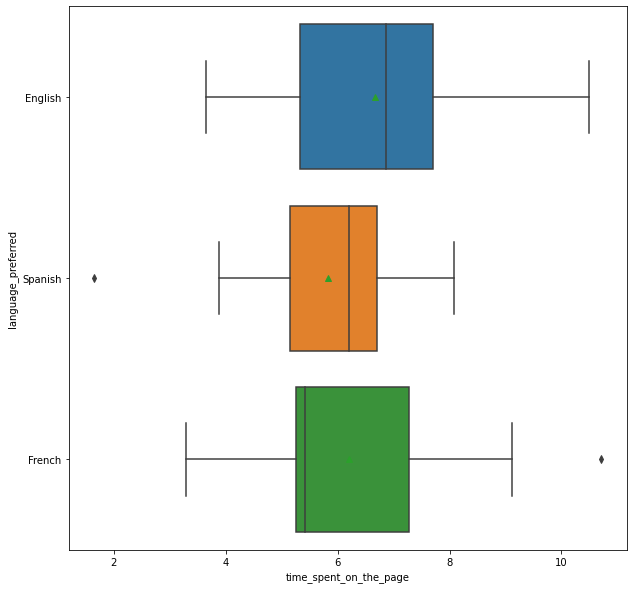

In [51]:
# set figure size
plt.figure(figsize=(10,10))

# draw boxplot comparing time on page and language preference for new landing page only with means
sns.boxplot(x = 'time_spent_on_the_page', y = 'language_preferred', showmeans = True, data = df_new_page);

In [52]:
# calculate the mean time spent on page per langugage for new landing page only
df_new_page.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

####Observations
* There is an outlier in the Spanish data set.
* English and French users spent longer on the new page than Spanish users. 
* English users had the greatest mean time spent on the new landing page, while Spanish users had the lowest mean time.


### Step 1: Define the null and alternate hypotheses

Ho: The mean time spent on the new landing page is equal for all languages.

Ha: The mean time spent on the new landing page for at least one of the three languages is different.

Signifiacance level = 0.05

### Step 2: Select Appropriate test

There are three population means. A test of means for more than two populations requires a one-way ANOVA F-test. 

### Confirm F-Test Assumptions
Normality and equality checks are performed below with the appropriate tests.


####Shapiro-Wilk's Test for Normality
Ho: Time spent on the page follows a normal distribution.

Ha: Time spent on the page does not follow a normal distribution.

Significance level = 0.05

In [53]:
# import required function
from scipy.stats import shapiro

# return the test statistic and p-value using data from new landing page data set
test_stat, p_value = shapiro(df_new_page['time_spent_on_the_page'])

print('The p-value is', p_value)

The p-value is 0.8040016293525696


In [54]:
# print conclusion using if/else statement
if p_value < 0.05:
    print(f'{p_value} is less than the level of significance, so we reject the null hypothesis.')
else:
    print(f'{p_value} is greater than the level of significance, so we fail to reject the null hypothesis.')

0.8040016293525696 is greater than the level of significance, so we fail to reject the null hypothesis.


####Observations
* 0.804 is larger than 0.05, the level of significance, so we fail to reject the null hypothesis. 
* The time spent on the page follows a normal distribution.

###Levene's Test for Equality
Ho: All population variances are equal.

Ha: At least one population variance is different and not equal.

Significance level = 0.05

In [55]:
# import required fumction
from scipy.stats import levene

# return the test statistic and p-value using data from new landing page data set
test_stat, p_value = levene(df_new_page['time_spent_on_the_page'][df_new_page['language_preferred']=='English'],
                            df_new_page['time_spent_on_the_page'][df_new_page['language_preferred']== 'French'],
                            df_new_page['time_spent_on_the_page'][df_new_page['language_preferred']=='Spanish'])

print('The p-value is', p_value)


The p-value is 0.46711357711340173


In [56]:
# print conclusion using if/else statement
if p_value < 0.05:
    print(f'{p_value} is less than the level of significance, so we reject the null hypothesis.')
else:
    print(f'{p_value} is greater than the level of significance, so we fail to reject the null hypothesis.')

0.46711357711340173 is greater than the level of significance, so we fail to reject the null hypothesis.


####Observations
* 0.467 is greater than 0.05, the level of significance, so we fail to reject the null hypothesis. 
* All variances are equal.

## Confirm F-Test Assumptions
* Normal Distribution: Yes, normal distribution was verified with the Shapiro-Wilk's test.
* Equal Population Variations: Yes, equal variances confirmed with Levene's test.
* Independent random samples: Yes.

All assumptions for ANOVA F-test satisfied.

###Calculate the p-value using F-test

In [57]:
# import required function
from scipy.stats import f_oneway

# return the test statistic and p-value using data from new landing page data set
test_stat, p_value = f_oneway(df_new_page.loc[df_new_page['language_preferred']=='English','time_spent_on_the_page'],
                              df_new_page.loc[df_new_page['language_preferred']=='French','time_spent_on_the_page'],
                              df_new_page.loc[df_new_page['language_preferred']=='Spanish','time_spent_on_the_page'])

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [58]:
# print conclusion using if/else statement
if p_value < 0.05:
    print(f'{p_value} is less than the level of significance, so we reject the null hypothesis.')
else:
    print(f'{p_value} is greater than the level of significance, so we fail to reject the null hypothesis.')

0.43204138694325955 is greater than the level of significance, so we fail to reject the null hypothesis.


### Step 7:  Draw inference

* The p-value, 0.432 is greater than 0.05, so we fail to reject the null hypothesis.
* There is enough statistical evidence to conclude that the meant time spent on the new landing page for all languages is equal.

## Conclusion and Business Recommendations

**Conclusions based on the statistical and visual analyses**

At a significance level of 5%, I conclude:

1. Users spent more time on the new landing page than the old landing page. 
2. The conversion rate for the old page is lower than the conversion rate for the new page. 
3. Language preference does not affect conversion status. 
4. All languages have the same mean time spent on the new landing page.

**Recommendations**
1. There is enough evidence to prove the new landing page will improve customer retention times on the web portal and increase conversion rates. 
2. It has been proven the new landing page does not impact conversion status or time spent on the page across different language preferences. 

It is my recommendation that the company deploy the new landing page. 


In [70]:
# code to convert Jupyter notebook in Google Colab to html format for submission
%%shell
jupyter nbconvert --to html ///content/ENews_Express_Kimberly_Magerl.ipynb

[NbConvertApp] Converting notebook ///content/ENews_Express_Kimberly_Magerl.ipynb to html
[NbConvertApp] Writing 616445 bytes to ///content/ENews_Express_Kimberly_Magerl.html
